In [70]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload 
reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\Gautamk\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [2]:
maps_df = pd.read_csv('MapData.csv')
maps_df

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,...,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17
0,0,S,0,E,Relatively Flat,140,-929,-1,2,2,...,Superconducting Computing,Construction Nanites,Multispiral Architecture,Core Metals,Cloning,Cryo-sleep,Resilient Vegetation,Landscaping Nanites,Alien Imprints,Zero-Space Computing
1,0,S,1,E,Relatively Flat,100,-1160,-1,2,2,...,Martian Diet,Resilient Vegetation,Construction Nanites,Core Rare Metals,Dry Farming,Superconducting Computing,Martianborn Ingenuity,Designed Forestation,Cloning,Service Bots
2,0,S,1,W,Relatively Flat,100,-1160,-3,2,2,...,Frictionless Composites,Dry Farming,Martian Diet,Nocturnal Adaptation,Prefab Compression,Magnetic Extraction,Martian Steel,Hive Mind,Nano Refinement,Extractor AI
3,0,S,2,E,Relatively Flat,140,-1160,-1,2,2,...,Alien Imprints,Inspiring Architecture,Ancient Terraforming Device,Nocturnal Adaptation,Good Vibrations,Nano Refinement,Superconducting Computing,Multispiral Architecture,Plasma Rocket,Superior Cables
4,0,S,2,W,Relatively Flat,100,-929,-3,2,2,...,Neural Empathy,Overcharge Amplifications,Dome Streamlining,Nano Refinement,Nocturnal Adaptation,Zero-Space Computing,Eternal Fusion,Giant Crops,Magnetic Extraction,Core Metals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50896,70,N,179,W,Relatively Flat,100,-4276,-98,1,1,...,Safe Mode,Cryo-sleep,Core Metals,Cloning,Rapid Sleep,Vector Pump,Martian Steel,Plutonium Synthesis,Ancient Terraforming Device,Sustained Workload
50897,70,S,180,E,Steep,220,1840,-65,1,1,...,Multispiral Architecture,Superior Cables,Overcharge Amplifications,Superfungus,Cloning,Vector Pump,Superconducting Computing,Vocation-Oriented Society,Lake Vaporators,Nano Refinement
50898,70,S,180,W,Relatively Flat,140,1379,-65,1,1,...,Sustained Workload,Martianborn Ingenuity,Eternal Fusion,Interplanetary Learning,Dry Farming,Project Phoenix,The Positronic Brain,Wireless Power,Soylent Green,Service Bots
50899,70,N,180,E,Relatively Flat,140,-4276,-100,1,1,...,Zero-Space Computing,Superior Cables,Multispiral Architecture,Good Vibrations,Superconducting Computing,Gene Selection,Vector Pump,Martian Diet,Neural Empathy,Vocation-Oriented Society


In [3]:
maps_df.shape

(50901, 35)

In [4]:
maps_df.columns

Index(['Latitude °', 'Latitude', 'Longitude °', 'Longitude', 'Topography',
       'Difficulty Challenge', 'Altitude', 'Temperature', 'Metals',
       'Rare Metals', 'Concrete', 'Water', 'Dust Devils', 'Dust Storms',
       'Meteors', 'Cold Waves', 'Map Name', 'Named Location', 'Breakthrough 1',
       'Breakthrough 2', 'Breakthrough 3', 'Breakthrough 4', 'Breakthrough 5',
       'Breakthrough 6', 'Breakthrough 7', 'Breakthrough 8', 'Breakthrough 9',
       'Breakthrough 10', 'Breakthrough 11', 'Breakthrough 12',
       'Breakthrough 13', 'Breakthrough 14', 'Breakthrough 15',
       'Breakthrough 16', 'Breakthrough 17'],
      dtype='object')

In [5]:
maps_df.axes

[RangeIndex(start=0, stop=50901, step=1),
 Index(['Latitude °', 'Latitude', 'Longitude °', 'Longitude', 'Topography',
        'Difficulty Challenge', 'Altitude', 'Temperature', 'Metals',
        'Rare Metals', 'Concrete', 'Water', 'Dust Devils', 'Dust Storms',
        'Meteors', 'Cold Waves', 'Map Name', 'Named Location', 'Breakthrough 1',
        'Breakthrough 2', 'Breakthrough 3', 'Breakthrough 4', 'Breakthrough 5',
        'Breakthrough 6', 'Breakthrough 7', 'Breakthrough 8', 'Breakthrough 9',
        'Breakthrough 10', 'Breakthrough 11', 'Breakthrough 12',
        'Breakthrough 13', 'Breakthrough 14', 'Breakthrough 15',
        'Breakthrough 16', 'Breakthrough 17'],
       dtype='object')]

In [6]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude °            50901 non-null  int64 
 1   Latitude              50901 non-null  object
 2   Longitude °           50901 non-null  int64 
 3   Longitude             50901 non-null  object
 4   Topography            50901 non-null  object
 5   Difficulty Challenge  50901 non-null  int64 
 6   Altitude              50901 non-null  int64 
 7   Temperature           50901 non-null  int64 
 8   Metals                50901 non-null  int64 
 9   Rare Metals           50901 non-null  int64 
 10  Concrete              50901 non-null  int64 
 11  Water                 50901 non-null  int64 
 12  Dust Devils           50901 non-null  int64 
 13  Dust Storms           50901 non-null  int64 
 14  Meteors               50901 non-null  int64 
 15  Cold Waves            50901 non-null

In [7]:
maps_df.drop(['Map Name','Named Location','Breakthrough 1','Breakthrough 2','Breakthrough 3','Breakthrough 4','Breakthrough 5','Breakthrough 6','Breakthrough 7','Breakthrough 8','Breakthrough 9','Breakthrough 10','Breakthrough 11','Breakthrough 12','Breakthrough 13','Breakthrough 14','Breakthrough 15','Breakthrough 16','Breakthrough 17'], axis = 1, inplace = True)

In [8]:
maps_df

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
0,0,S,0,E,Relatively Flat,140,-929,-1,2,2,4,1,2,1,4,1
1,0,S,1,E,Relatively Flat,100,-1160,-1,2,2,4,1,2,1,4,1
2,0,S,1,W,Relatively Flat,100,-1160,-3,2,2,4,1,2,2,4,1
3,0,S,2,E,Relatively Flat,140,-1160,-1,2,2,4,1,2,1,4,1
4,0,S,2,W,Relatively Flat,100,-929,-3,2,2,4,1,2,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50896,70,N,179,W,Relatively Flat,100,-4276,-98,1,1,3,1,1,2,1,4
50897,70,S,180,E,Steep,220,1840,-65,1,1,1,1,2,1,1,4
50898,70,S,180,W,Relatively Flat,140,1379,-65,1,1,1,1,2,1,1,4
50899,70,N,180,E,Relatively Flat,140,-4276,-100,1,1,2,1,1,2,1,4


In [9]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude °            50901 non-null  int64 
 1   Latitude              50901 non-null  object
 2   Longitude °           50901 non-null  int64 
 3   Longitude             50901 non-null  object
 4   Topography            50901 non-null  object
 5   Difficulty Challenge  50901 non-null  int64 
 6   Altitude              50901 non-null  int64 
 7   Temperature           50901 non-null  int64 
 8   Metals                50901 non-null  int64 
 9   Rare Metals           50901 non-null  int64 
 10  Concrete              50901 non-null  int64 
 11  Water                 50901 non-null  int64 
 12  Dust Devils           50901 non-null  int64 
 13  Dust Storms           50901 non-null  int64 
 14  Meteors               50901 non-null  int64 
 15  Cold Waves            50901 non-null

In [10]:
maps_df['Topography'].unique()

array(['Relatively Flat', 'Steep', 'Rough', 'Mountainous'], dtype=object)

In [11]:
maps_df['Topography'].replace({'Relatively Flat':0, 'Steep':1, 'Rough':2, 'Mountainous':3}, inplace = True)

In [12]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude °            50901 non-null  int64 
 1   Latitude              50901 non-null  object
 2   Longitude °           50901 non-null  int64 
 3   Longitude             50901 non-null  object
 4   Topography            50901 non-null  int64 
 5   Difficulty Challenge  50901 non-null  int64 
 6   Altitude              50901 non-null  int64 
 7   Temperature           50901 non-null  int64 
 8   Metals                50901 non-null  int64 
 9   Rare Metals           50901 non-null  int64 
 10  Concrete              50901 non-null  int64 
 11  Water                 50901 non-null  int64 
 12  Dust Devils           50901 non-null  int64 
 13  Dust Storms           50901 non-null  int64 
 14  Meteors               50901 non-null  int64 
 15  Cold Waves            50901 non-null

In [13]:
maps_df['Latitude'].unique()

array(['S', 'N'], dtype=object)

In [14]:
maps_df['Latitude'].replace({'S':0, 'N':1}, inplace = True)

In [15]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude °            50901 non-null  int64 
 1   Latitude              50901 non-null  int64 
 2   Longitude °           50901 non-null  int64 
 3   Longitude             50901 non-null  object
 4   Topography            50901 non-null  int64 
 5   Difficulty Challenge  50901 non-null  int64 
 6   Altitude              50901 non-null  int64 
 7   Temperature           50901 non-null  int64 
 8   Metals                50901 non-null  int64 
 9   Rare Metals           50901 non-null  int64 
 10  Concrete              50901 non-null  int64 
 11  Water                 50901 non-null  int64 
 12  Dust Devils           50901 non-null  int64 
 13  Dust Storms           50901 non-null  int64 
 14  Meteors               50901 non-null  int64 
 15  Cold Waves            50901 non-null

In [16]:
maps_df['Longitude'].unique()

array(['E', 'W'], dtype=object)

In [17]:
maps_df['Longitude'].replace({'E':0, 'W':1}, inplace = True)

In [18]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Latitude °            50901 non-null  int64
 1   Latitude              50901 non-null  int64
 2   Longitude °           50901 non-null  int64
 3   Longitude             50901 non-null  int64
 4   Topography            50901 non-null  int64
 5   Difficulty Challenge  50901 non-null  int64
 6   Altitude              50901 non-null  int64
 7   Temperature           50901 non-null  int64
 8   Metals                50901 non-null  int64
 9   Rare Metals           50901 non-null  int64
 10  Concrete              50901 non-null  int64
 11  Water                 50901 non-null  int64
 12  Dust Devils           50901 non-null  int64
 13  Dust Storms           50901 non-null  int64
 14  Meteors               50901 non-null  int64
 15  Cold Waves            50901 non-null  int64
dtypes: i

In [19]:
maps_df

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
0,0,0,0,0,0,140,-929,-1,2,2,4,1,2,1,4,1
1,0,0,1,0,0,100,-1160,-1,2,2,4,1,2,1,4,1
2,0,0,1,1,0,100,-1160,-3,2,2,4,1,2,2,4,1
3,0,0,2,0,0,140,-1160,-1,2,2,4,1,2,1,4,1
4,0,0,2,1,0,100,-929,-3,2,2,4,1,2,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50896,70,1,179,1,0,100,-4276,-98,1,1,3,1,1,2,1,4
50897,70,0,180,0,1,220,1840,-65,1,1,1,1,2,1,1,4
50898,70,0,180,1,0,140,1379,-65,1,1,1,1,2,1,1,4
50899,70,1,180,0,0,140,-4276,-100,1,1,2,1,1,2,1,4


In [20]:
x = maps_df.drop(['Difficulty Challenge'], axis = 1)
y = maps_df['Difficulty Challenge']

In [21]:
x

,Latitude °,Latitude,Longitude °,Longitude,Topography,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
0,0,0,0,0,0,-929,-1,2,2,4,1,2,1,4,1
1,0,0,1,0,0,-1160,-1,2,2,4,1,2,1,4,1
2,0,0,1,1,0,-1160,-3,2,2,4,1,2,2,4,1
3,0,0,2,0,0,-1160,-1,2,2,4,1,2,1,4,1
4,0,0,2,1,0,-929,-3,2,2,4,1,2,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50896,70,1,179,1,0,-4276,-98,1,1,3,1,1,2,1,4
50897,70,0,180,0,1,1840,-65,1,1,1,1,2,1,1,4
50898,70,0,180,1,0,1379,-65,1,1,1,1,2,1,1,4
50899,70,1,180,0,0,-4276,-100,1,1,2,1,1,2,1,4


In [22]:
y

0        140
1        100
2        100
3        140
4        100
        ... 
50896    100
50897    220
50898    140
50899    140
50900    140
Name: Difficulty Challenge, Length: 50901, dtype: int64

In [23]:
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00555556, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00555556, ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [24]:
maps_df1 = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [25]:
maps_df1

,Latitude °,Latitude,Longitude °,Longitude,Topography,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
0,0.0,0.0,0.000000,0.0,0.000000,0.247069,1.000000,0.333333,0.333333,1.000000,0.0,0.333333,0.000000,1.0,0.0
1,0.0,0.0,0.005556,0.0,0.000000,0.239220,1.000000,0.333333,0.333333,1.000000,0.0,0.333333,0.000000,1.0,0.0
2,0.0,0.0,0.005556,1.0,0.000000,0.239220,0.979798,0.333333,0.333333,1.000000,0.0,0.333333,0.333333,1.0,0.0
3,0.0,0.0,0.011111,0.0,0.000000,0.239220,1.000000,0.333333,0.333333,1.000000,0.0,0.333333,0.000000,1.0,0.0
4,0.0,0.0,0.011111,1.0,0.000000,0.247069,0.979798,0.333333,0.333333,1.000000,0.0,0.333333,0.666667,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50896,1.0,1.0,0.994444,1.0,0.000000,0.133338,0.020202,0.000000,0.000000,0.666667,0.0,0.000000,0.333333,0.0,1.0
50897,1.0,0.0,1.000000,0.0,0.333333,0.341160,0.353535,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.0,1.0
50898,1.0,0.0,1.000000,1.0,0.000000,0.325495,0.353535,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.0,1.0
50899,1.0,1.0,1.000000,0.0,0.000000,0.133338,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.0,1.0


In [26]:
x_train,x_test,y_train,y_test = train_test_split(maps_df1,y,test_size=0.2,random_state=1)

In [27]:
x_train

,Latitude °,Latitude,Longitude °,Longitude,Topography,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
3637,0.071429,1.0,0.538889,0.0,0.0,0.239220,1.000000,1.000000,1.000000,0.000000,1.000000,0.333333,1.000000,0.666667,0.000000
29084,0.571429,1.0,0.783333,1.0,0.0,0.172551,0.282828,0.666667,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
42246,0.842857,1.0,0.011111,1.0,0.0,0.125488,0.141414,0.333333,0.333333,1.000000,0.333333,0.000000,1.000000,0.000000,1.000000
30428,0.600000,1.0,0.644444,1.0,0.0,0.462741,0.282828,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,1.000000
47566,0.942857,0.0,0.383333,1.0,0.0,0.317646,0.717172,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.985714,1.0,0.833333,0.0,0.0,0.137246,0.141414,0.000000,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000,1.000000
32511,0.642857,0.0,0.533333,0.0,0.0,0.203915,0.858586,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000
5192,0.100000,0.0,0.694444,1.0,0.0,0.450984,0.858586,0.333333,0.333333,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000
12172,0.242857,0.0,0.361111,1.0,0.0,0.427436,1.000000,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333,0.000000,0.000000


In [28]:
x_test

,Latitude °,Latitude,Longitude °,Longitude,Topography,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
37488,0.742857,1.0,0.422222,1.0,0.0,0.172551,0.282828,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.666667,1.0
39530,0.785714,1.0,0.250000,1.0,0.0,0.133338,0.141414,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,1.0
1661,0.028571,0.0,0.805556,0.0,0.0,0.207856,0.858586,1.000000,1.000000,0.666667,0.333333,0.000000,1.000000,0.666667,0.0
40405,0.800000,0.0,0.466667,0.0,0.0,0.243128,0.909091,0.333333,0.333333,0.000000,0.666667,0.333333,0.666667,0.000000,0.0
27423,0.542857,1.0,0.483333,0.0,0.0,0.156852,0.282828,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,0.971429,1.0,0.450000,0.0,0.0,0.152944,0.141414,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
769,0.014286,1.0,0.566667,0.0,0.0,0.262734,1.000000,1.000000,1.000000,0.333333,1.000000,0.333333,0.666667,0.666667,0.0
21495,0.428571,1.0,0.272222,0.0,0.0,0.235278,0.424242,0.333333,0.333333,0.000000,0.666667,0.000000,1.000000,0.333333,1.0
31285,0.614286,1.0,0.833333,0.0,0.0,0.160794,0.282828,0.666667,0.666667,0.666667,0.000000,0.000000,1.000000,0.333333,1.0


In [29]:
y_train

3637     100
29084    140
42246    100
30428    140
47566    140
        ... 
50057    140
32511    140
5192     140
12172    140
33003    140
Name: Difficulty Challenge, Length: 40720, dtype: int64

In [30]:
y_test

37488    100
39530    100
1661     140
40405    140
27423    140
        ... 
49059    140
769      100
21495    140
31285    140
16719    100
Name: Difficulty Challenge, Length: 10181, dtype: int64

# LINEAR REGRESSION

In [31]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred_train = lin_model.predict(x_train)
y_pred_train

array([125.05899445, 122.01363867, 121.83076153, ..., 123.78086344,
       123.52740345, 123.51918796])

In [33]:
y_train[0:10]

3637     100
29084    140
42246    100
30428    140
47566    140
11614    140
828      140
39235    140
21254    140
30620    140
Name: Difficulty Challenge, dtype: int64

In [34]:
y_pred_test = lin_model.predict(x_test)
y_pred_test

array([124.78211722, 123.64238343, 120.79682959, ..., 120.77620449,
       124.60657145, 126.70835773])

# KNN

In [36]:
knn_model = KNeighborsRegressor()

In [35]:
r2_score = r2_score(y_train,y_pred_train)
r2_score

0.5418626076116626

In [37]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [38]:
y_pred_train = knn_model.predict(x_train)
y_pred_train

array([108., 124., 108., ..., 140., 124., 116.])

In [39]:
y_train[0:10]

3637     100
29084    140
42246    100
30428    140
47566    140
11614    140
828      140
39235    140
21254    140
30620    140
Name: Difficulty Challenge, dtype: int64

In [40]:
y_pred_train = knn_model.predict(x_train)
y_pred_train[0:10]

array([108., 124., 108., 132., 116., 140., 132., 124., 116., 124.])

In [41]:
y_pred_test = knn_model.predict(x_test)
y_pred_test

array([124., 116., 132., ..., 108., 116., 116.])

In [44]:
mse = mean_squared_error(y_train,y_pred_train)
mse

353.0565815324165

In [65]:
r2_score = r2_score(y_train,y_pred_train)
r2_score

0.703340461196668

In [73]:
r2score = r2_score(y_test,y_pred_test)
r2score

0.5314019473860467

<Figure size 2160x2160 with 0 Axes>

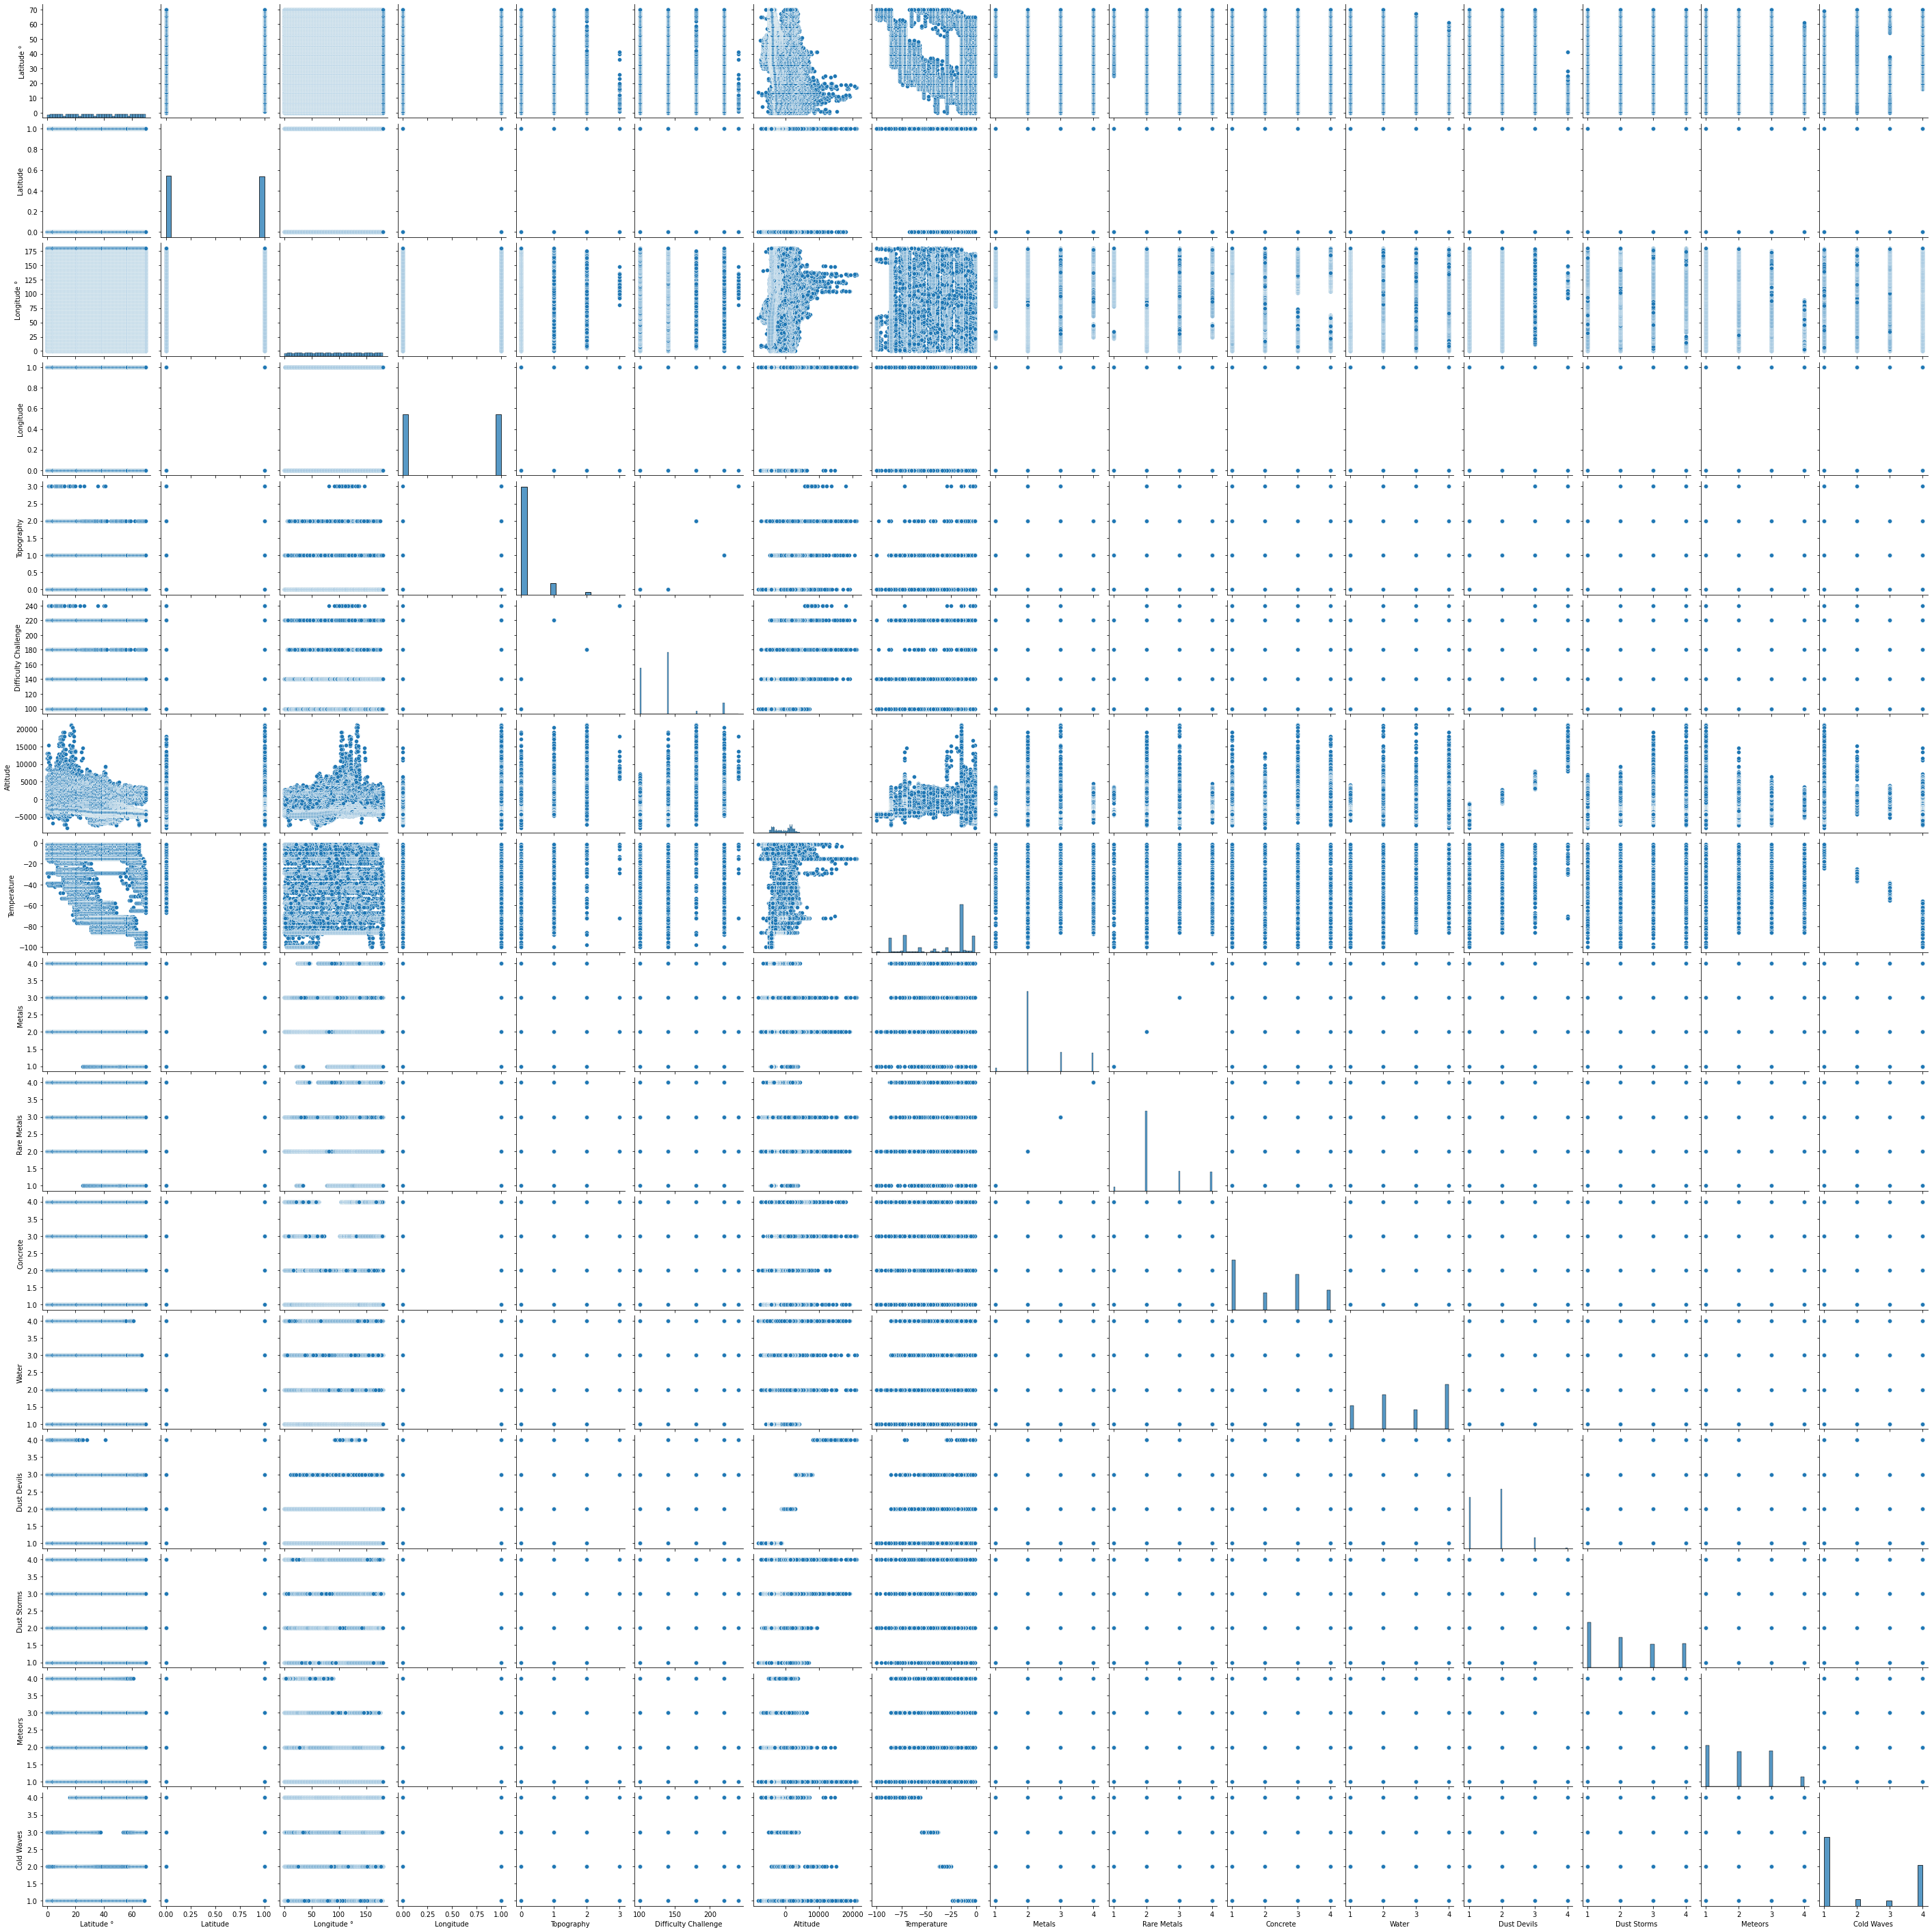

In [51]:
plt.figure(figsize = (30,30))     #length / height
sns.pairplot(maps_df,kind = 'scatter')

<AxesSubplot:>

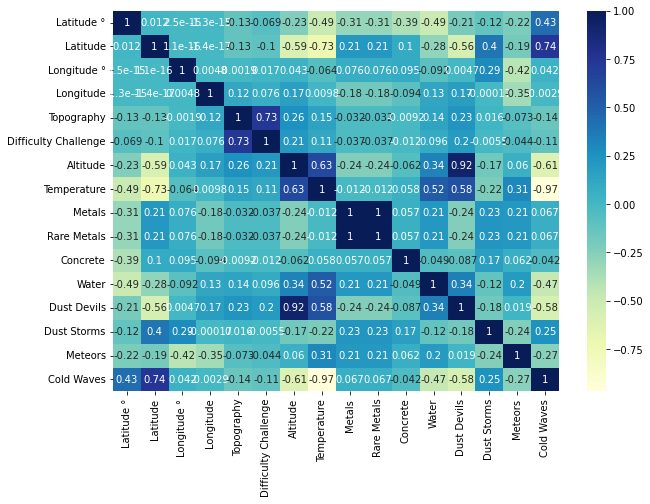

In [52]:
plt.figure(figsize = (10,7))
sns.heatmap(maps_df.corr(), annot = True, cmap = 'YlGnBu')

<AxesSubplot:>

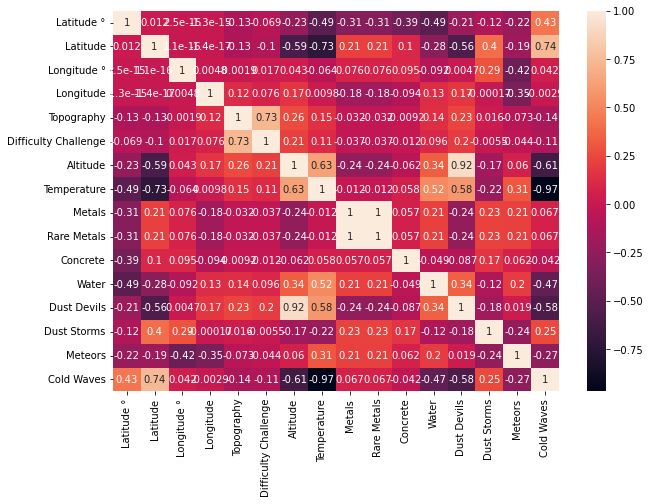

In [53]:
plt.figure(figsize = (10,7))
sns.heatmap(maps_df.corr(), annot = True)

In [54]:
maps_df.corr()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
Latitude °,1.000000e+00,1.228312e-02,2.470020e-15,-1.339336e-15,-0.125434,-0.069408,-0.233828,-0.492161,-0.306052,-0.306052,-0.386559,-0.492930,-0.206747,-0.121400,-0.219220,0.431286
Latitude,1.228312e-02,1.000000e+00,1.109941e-16,-1.443085e-17,-0.126546,-0.103502,-0.590398,-0.726838,0.214052,0.214052,0.100223,-0.284738,-0.562800,0.399271,-0.194770,0.740848
Longitude °,2.470020e-15,1.109941e-16,1.000000e+00,4.797869e-03,-0.001866,0.016759,0.043259,-0.063816,0.076260,0.076260,0.095069,-0.092335,0.004657,0.286524,-0.422714,0.042103
Longitude,-1.339336e-15,-1.443085e-17,4.797869e-03,1.000000e+00,0.121414,0.076079,0.165529,0.009763,-0.177292,-0.177292,-0.094372,0.127789,0.173057,-0.000169,-0.347614,-0.002855
Topography,-1.254343e-01,-1.265455e-01,-1.866252e-03,1.214139e-01,1.000000,0.732892,0.255617,0.151830,-0.032173,-0.032173,-0.009217,0.138836,0.231427,0.015974,-0.073058,-0.141463
Difficulty Challenge,-6.940848e-02,-1.035024e-01,1.675878e-02,7.607865e-02,0.732892,1.000000,0.210495,0.113400,-0.037074,-0.037074,-0.011978,0.095905,0.196644,-0.005502,-0.043667,-0.110027
Altitude,-2.338278e-01,-5.903977e-01,4.325945e-02,1.655291e-01,0.255617,0.210495,1.000000,0.629757,-0.243071,-0.243071,-0.061719,0.335034,0.917754,-0.169779,0.059748,-0.614856
Temperature,-4.921614e-01,-7.268378e-01,-6.381623e-02,9.762985e-03,0.151830,0.113400,0.629757,1.000000,-0.011719,-0.011719,0.058008,0.521546,0.584043,-0.216048,0.307819,-0.968219
Metals,-3.060521e-01,2.140522e-01,7.625992e-02,-1.772921e-01,-0.032173,-0.037074,-0.243071,-0.011719,1.000000,1.000000,0.056944,0.211691,-0.243842,0.229319,0.208500,0.066735
Rare Metals,-3.060521e-01,2.140522e-01,7.625992e-02,-1.772921e-01,-0.032173,-0.037074,-0.243071,-0.011719,1.000000,1.000000,0.056944,0.211691,-0.243842,0.229319,0.208500,0.066735


In [55]:
mean_absolute_error(y_pred_test,y_test)

19.35016206659464

In [57]:
MSE = mean_squared_error(y_test,y_pred_test)
print('Mean squared error is :', MSE)

Mean squared error is : 569.7027796876534


In [58]:
rmse = np.sqrt(MSE)
print('Root Means Squared is :',rmse)

Root Means Squared is : 23.868447366505713


In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [75]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [76]:
y_pred = log_model.predict(x_test)
y_pred

array([140, 140, 140, ..., 140, 140, 140], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred)

0.6215499459778018

In [78]:
confusion_matrix(y_test,y_pred)

array([[  64, 3792,    0,    0,    0],
       [  50, 5060,    0,    0,    0],
       [   0,    0,  239,    3,    0],
       [   0,    0,    0,  965,    0],
       [   0,    0,    8,    0,    0]], dtype=int64)

In [79]:
clf_report = classification_report(y_test,y_pred)

In [80]:
print(clf_report)

              precision    recall  f1-score   support

         100       0.56      0.02      0.03      3856
         140       0.57      0.99      0.72      5110
         180       0.97      0.99      0.98       242
         220       1.00      1.00      1.00       965
         240       0.00      0.00      0.00         8

    accuracy                           0.62     10181
   macro avg       0.62      0.60      0.55     10181
weighted avg       0.62      0.62      0.49     10181



In [81]:
y_pred_prob = log_model.predict_proba(x_test)

In [82]:
y_pred_prob

array([[4.55501284e-01, 5.42166598e-01, 5.90510536e-07, 2.33140587e-03,
        1.21011618e-07],
       [4.36079428e-01, 5.61034391e-01, 1.67232285e-06, 2.88409986e-03,
        4.09110812e-07],
       [4.61776153e-01, 5.31908584e-01, 7.74930332e-07, 6.31215782e-03,
        2.32941924e-06],
       ...,
       [4.35261669e-01, 5.61824503e-01, 5.31748699e-07, 2.91256604e-03,
        7.30633036e-07],
       [4.57110624e-01, 5.39279101e-01, 1.91492648e-07, 3.60990589e-03,
        1.78087350e-07],
       [4.33213918e-01, 5.61832877e-01, 3.25645467e-07, 4.95026708e-03,
        2.61168503e-06]])

In [91]:
y_pred_prob[:,1]

array([0.5421666 , 0.56103439, 0.53190858, ..., 0.5618245 , 0.5392791 ,
       0.56183288])